# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

## Generate Cities List

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
weather_api_key

'c6581d37a3c42b1452edb295b75733e5'

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
cities_list = []

#loop through cities
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(response)
        cities_list.append({
            "lat":response['coord']['lat'],
            "temp":response['main']['temp'],
            "lon":response['coord']['lon'],
            "humidity":response['main']['humidity'],
            "clouds":response['clouds']['all'],
            'wind':response['wind']['speed'],
            "city":city,
            "country":response["sys"]["country"]
        })
    except Exception as e:
        print("City Not Found",e)

{'coord': {'lon': -134.9692, 'lat': -23.1203}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.77, 'feels_like': 26.23, 'temp_min': 25.77, 'temp_max': 25.77, 'pressure': 1016, 'humidity': 70, 'sea_level': 1016, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 65, 'gust': 2.18}, 'clouds': {'all': 100}, 'dt': 1676481116, 'sys': {'country': 'PF', 'sunrise': 1676472505, 'sunset': 1676518791}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
{'coord': {'lon': -67.3302, 'lat': 10.2184}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.2, 'feels_like': 29.52, 'temp_min': 28.2, 'temp_max': 28.2, 'pressure': 1014, 'humidity': 58, 'sea_level': 1014, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 1.06, 'deg': 72, 'gust': 2.47}, 'clouds': {'all': 51}, 'dt': 1676481116, 'sys': {'cou

{'coord': {'lon': -70.9167, 'lat': -53.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 8.46, 'feels_like': 3.89, 'temp_min': 7.84, 'temp_max': 9.06, 'pressure': 1004, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 11.32, 'deg': 270}, 'rain': {'1h': 0.25}, 'clouds': {'all': 40}, 'dt': 1676481121, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1676454113, 'sunset': 1676506439}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
{'coord': {'lon': -139.0333, 'lat': -9.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 26.14, 'feels_like': 26.14, 'temp_min': 26.14, 'temp_max': 26.14, 'pressure': 1013, 'humidity': 71, 'sea_level': 1013, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 7.87, 'deg': 90, 'gust': 8.13}, 'clouds': {'all': 23}, 'dt': 1676480994, 'sys': {'country': 'PF', 'sun

{'coord': {'lon': 168.8643, 'lat': -46.1927}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.15, 'feels_like': 10.67, 'temp_min': 11.15, 'temp_max': 11.15, 'pressure': 1012, 'humidity': 90, 'sea_level': 1012, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 0.42, 'deg': 292, 'gust': 0.52}, 'clouds': {'all': 74}, 'dt': 1676481128, 'sys': {'country': 'NZ', 'sunrise': 1676483990, 'sunset': 1676534266}, 'timezone': 46800, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
{'coord': {'lon': -159.775, 'lat': -21.2078}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.03, 'feels_like': 26.03, 'temp_min': 26.03, 'temp_max': 26.03, 'pressure': 1013, 'humidity': 94}, 'visibility': 8000, 'wind': {'speed': 1.54, 'deg': 90}, 'rain': {'1h': 0.18}, 'clouds': {'all': 75}, 'dt': 1676481128, 'sys': {'type': 1, 'id': 7271, 'country': 'CK', 

{'coord': {'lon': -75.833, 'lat': 42.2506}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 14.78, 'feels_like': 13.59, 'temp_min': 13.37, 'temp_max': 16.05, 'pressure': 993, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 220, 'gust': 10.8}, 'clouds': {'all': 40}, 'dt': 1676481133, 'sys': {'type': 2, 'id': 2036074, 'country': 'US', 'sunrise': 1676462412, 'sunset': 1676500500}, 'timezone': -18000, 'id': 5110365, 'name': 'Broome', 'cod': 200}
{'coord': {'lon': 20.0403, 'lat': -34.5322}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.5, 'feels_like': 21.46, 'temp_min': 21.5, 'temp_max': 21.5, 'pressure': 1012, 'humidity': 67, 'sea_level': 1012, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 6.27, 'deg': 140, 'gust': 7.41}, 'clouds': {'all': 97}, 'dt': 1676481133, 'sys': {'country': 'ZA', 

{'coord': {'lon': 28.1667, 'lat': 38.8333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -0.38, 'feels_like': -4.42, 'temp_min': -0.38, 'temp_max': -0.38, 'pressure': 1029, 'humidity': 79, 'sea_level': 1029, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 3.56, 'deg': 1, 'gust': 4.58}, 'clouds': {'all': 31}, 'dt': 1676481138, 'sys': {'country': 'TR', 'sunrise': 1676437161, 'sunset': 1676475832}, 'timezone': 10800, 'id': 304825, 'name': 'Manisa Province', 'cod': 200}
{'coord': {'lon': 105.0179, 'lat': 33.2288}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.19, 'feels_like': -2.17, 'temp_min': -0.19, 'temp_max': -0.19, 'pressure': 1027, 'humidity': 87, 'sea_level': 1027, 'grnd_level': 825}, 'visibility': 10000, 'wind': {'speed': 1.63, 'deg': 177, 'gust': 1.84}, 'clouds': {'all': 100}, 'dt': 1676481138, 'sys

{'coord': {'lon': 122.7617, 'lat': 63.8986}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -37.67, 'feels_like': -44.1, 'temp_min': -37.67, 'temp_max': -37.67, 'pressure': 1031, 'humidity': 100, 'sea_level': 1031, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 1.34, 'deg': 83, 'gust': 1.23}, 'clouds': {'all': 79}, 'dt': 1676481143, 'sys': {'country': 'RU', 'sunrise': 1676504564, 'sunset': 1676535820}, 'timezone': 32400, 'id': 2021017, 'name': 'Kysyl-Syr', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found 'coord'
{'coord': {'lon': 147.3294, 'lat': -42.8794}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.83, 'feels_like': 14.72, 'temp_min': 11.92, 'temp_max': 15.59, 'pressure': 1009, 'humidity': 90}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 200}, 'clouds': {'all': 74}, 'dt': 1676

{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 23.36, 'feels_like': 23.53, 'temp_min': 23.36, 'temp_max': 23.36, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 8.86, 'deg': 177, 'gust': 10.58}, 'clouds': {'all': 0}, 'dt': 1676481150, 'sys': {'country': 'AU', 'sunrise': 1676499136, 'sunset': 1676545630}, 'timezone': 28800, 'id': 2074865, 'name': 'Carnarvon', 'cod': 200}
{'coord': {'lon': 43.975, 'lat': 26.326}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.22, 'feels_like': 13.87, 'temp_min': 15.22, 'temp_max': 15.22, 'pressure': 1015, 'humidity': 41, 'sea_level': 1015, 'grnd_level': 945}, 'visibility': 10000, 'wind': {'speed': 8.22, 'deg': 19, 'gust': 10.31}, 'clouds': {'all': 92}, 'dt': 1676481150, 'sys': {'country

{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 25.03, 'feels_like': 25.63, 'temp_min': 24.45, 'temp_max': 25.03, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1676481154, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1676458981, 'sunset': 1676504115}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found 'coord'
{'coord': {'lon': 178.4167, 'lat': 69.3833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -36.59, 'feels_like': -43.59, 'temp_min': -36.59, 'temp_max': -36.59, 'pressure': 1027, 'humidity': 97, 'sea_level': 1027, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 3.19, 'deg': 279, 'gust': 5.74}, 'clouds': {'all': 

{'coord': {'lon': 46.5172, 'lat': 34.7961}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -0.53, 'feels_like': -3.22, 'temp_min': -0.53, 'temp_max': -0.53, 'pressure': 1018, 'humidity': 73, 'sea_level': 1018, 'grnd_level': 857}, 'visibility': 10000, 'wind': {'speed': 2.12, 'deg': 267, 'gust': 1.98}, 'clouds': {'all': 5}, 'dt': 1676481159, 'sys': {'country': 'IR', 'sunrise': 1676432426, 'sunset': 1676471760}, 'timezone': 12600, 'id': 130245, 'name': 'Javānrūd', 'cod': 200}
{'coord': {'lon': 34.9482, 'lat': 29.5581}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.91, 'feels_like': 13.97, 'temp_min': 14.91, 'temp_max': 14.91, 'pressure': 1020, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1676481160, 'sys': {'type': 1, 'id': 7521, 'country': 'IL', 'sunrise': 1676434811, 'su

{'coord': {'lon': 30.7861, 'lat': 59.7035}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.73, 'feels_like': -0.48, 'temp_min': -1.23, 'temp_max': 1.94, 'pressure': 1027, 'humidity': 97, 'sea_level': 1027, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 2.03, 'deg': 162, 'gust': 4.93}, 'clouds': {'all': 100}, 'dt': 1676481164, 'sys': {'type': 2, 'id': 47750, 'country': 'RU', 'sunrise': 1676439328, 'sunset': 1676472408}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found 'coord'
{'coord': {'lon': -78.1522, 'lat': -10.0681}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.28, 'feels_like': 25.87, 'temp_min': 25.28, 'temp_max': 25.28, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': 

{'coord': {'lon': -1.6745, 'lat': 42.5269}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.19, 'feels_like': 12.05, 'temp_min': 13.19, 'temp_max': 13.49, 'pressure': 1028, 'humidity': 57, 'sea_level': 1028, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 1.3, 'deg': 205, 'gust': 1.31}, 'clouds': {'all': 55}, 'dt': 1676481170, 'sys': {'type': 1, 'id': 6417, 'country': 'ES', 'sunrise': 1676444657, 'sunset': 1676482659}, 'timezone': 3600, 'id': 3108412, 'name': 'Tafalla', 'cod': 200}
{'coord': {'lon': -7.3528, 'lat': 4.423}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.87, 'feels_like': 32.45, 'temp_min': 28.87, 'temp_max': 28.87, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 2.51, 'deg': 199, 'gust': 3.05}, 'rain': {'1h': 0.29}, 'clouds': {'all': 15

{'coord': {'lon': 168.3333, 'lat': -46.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.69, 'feels_like': 12.31, 'temp_min': 12.69, 'temp_max': 12.69, 'pressure': 1012, 'humidity': 88, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 1.87, 'deg': 122, 'gust': 2.96}, 'clouds': {'all': 63}, 'dt': 1676481175, 'sys': {'country': 'NZ', 'sunrise': 1676484068, 'sunset': 1676534443}, 'timezone': 46800, 'id': 2206939, 'name': 'Bluff', 'cod': 200}
{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.7, 'feels_like': 15.13, 'temp_min': 15.07, 'temp_max': 16.51, 'pressure': 1023, 'humidity': 69, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 5.78, 'deg': 358, 'gust': 8.37}, 'clouds': {'all': 74}, 'dt': 1676481175, 'sys': {'type': 2, '

{'coord': {'lon': 118.5667, 'lat': -20.3167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 31.03, 'feels_like': 34.42, 'temp_min': 31.03, 'temp_max': 31.03, 'pressure': 1004, 'humidity': 58}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 260}, 'clouds': {'all': 44}, 'dt': 1676481179, 'sys': {'type': 1, 'id': 9585, 'country': 'AU', 'sunrise': 1676498246, 'sunset': 1676544152}, 'timezone': 28800, 'id': 2063042, 'name': 'Port Hedland', 'cod': 200}
{'coord': {'lon': 25.7822, 'lat': -24.6667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.46, 'feels_like': 25.86, 'temp_min': 25.46, 'temp_max': 25.46, 'pressure': 1009, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 40}, 'clouds': {'all': 75}, 'dt': 1676481179, 'sys': {'type': 1, 'id': 2012, 'country': 'BW', 'sunrise': 1676433805, 'sunset': 167648

{'coord': {'lon': 57.6608, 'lat': -20.0064}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 24.65, 'feels_like': 25.05, 'temp_min': 24.65, 'temp_max': 24.65, 'pressure': 1013, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 126, 'gust': 2.24}, 'clouds': {'all': 14}, 'dt': 1676481183, 'sys': {'type': 2, 'id': 2002134, 'country': 'MU', 'sunrise': 1676426458, 'sunset': 1676472379}, 'timezone': 14400, 'id': 934479, 'name': 'Grand Gaube', 'cod': 200}
{'coord': {'lon': -55.8661, 'lat': -1.7656}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.52, 'feels_like': 33.63, 'temp_min': 30.52, 'temp_max': 30.52, 'pressure': 1009, 'humidity': 59, 'sea_level': 1009, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 1.94, 'deg': 82, 'gust': 4.01}, 'clouds': {'all': 98}, 'dt': 1676481184, 'sys': {'country': 'BR',

{'coord': {'lon': 17.7167, 'lat': -19.2333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.81, 'feels_like': 27.32, 'temp_min': 27.81, 'temp_max': 27.81, 'pressure': 1002, 'humidity': 37, 'sea_level': 1002, 'grnd_level': 868}, 'visibility': 10000, 'wind': {'speed': 0.97, 'deg': 336, 'gust': 1.38}, 'clouds': {'all': 95}, 'dt': 1676481189, 'sys': {'country': 'NA', 'sunrise': 1676436096, 'sunset': 1676481913}, 'timezone': 7200, 'id': 3352593, 'name': 'Tsumeb', 'cod': 200}
{'coord': {'lon': 153.6833, 'lat': 67.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35.62, 'feels_like': -42.12, 'temp_min': -35.62, 'temp_max': -35.62, 'pressure': 1031, 'humidity': 99, 'sea_level': 1031, 'grnd_level': 1028}, 'visibility': 1651, 'wind': {'speed': 1.43, 'deg': 225, 'gust': 1.36}, 'clouds': {'all': 98}, 'dt': 1676481189, 'sys': {'c

{'coord': {'lon': 81.4808, 'lat': 6.7989}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.6, 'feels_like': 19.89, 'temp_min': 19.6, 'temp_max': 19.6, 'pressure': 1013, 'humidity': 87, 'sea_level': 1013, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.31, 'deg': 356, 'gust': 6.33}, 'clouds': {'all': 5}, 'dt': 1676481195, 'sys': {'country': 'LK', 'sunrise': 1676422270, 'sunset': 1676465133}, 'timezone': 19800, 'id': 1224061, 'name': 'Wattegama', 'cod': 200}
{'coord': {'lon': -80.8222, 'lat': -5.5569}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.22, 'feels_like': 31.09, 'temp_min': 29.22, 'temp_max': 29.22, 'pressure': 1011, 'humidity': 58, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 250, 'gust': 3.33}, 'clouds': {'all': 100}, 'dt': 1676481195, 'sys': {'country': 

{'coord': {'lon': 33.4731, 'lat': 55.5189}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -9.91, 'feels_like': -14.26, 'temp_min': -9.91, 'temp_max': -9.91, 'pressure': 1029, 'humidity': 96, 'sea_level': 1029, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.16, 'deg': 355, 'gust': 4.8}, 'clouds': {'all': 50}, 'dt': 1676481200, 'sys': {'country': 'RU', 'sunrise': 1676437884, 'sunset': 1676472563}, 'timezone': 10800, 'id': 549718, 'name': 'Kholm-Zhirkovskiy', 'cod': 200}
{'coord': {'lon': -88.2667, 'lat': 21.2833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.59, 'feels_like': 31.43, 'temp_min': 30.59, 'temp_max': 30.59, 'pressure': 1015, 'humidity': 47, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.46, 'deg': 146, 'gust': 10.38}, 'clouds': {'all': 0}, 'dt': 1676481201, 'sys': 

{'coord': {'lon': 27.4306, 'lat': 66.7131}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.96, 'feels_like': -5.38, 'temp_min': -0.96, 'temp_max': -0.96, 'pressure': 1018, 'humidity': 95, 'sea_level': 1018, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 3.88, 'deg': 194, 'gust': 9.85}, 'clouds': {'all': 100}, 'dt': 1676481206, 'sys': {'country': 'FI', 'sunrise': 1676442124, 'sunset': 1676471222}, 'timezone': 7200, 'id': 653272, 'name': 'Kemijärvi', 'cod': 200}
{'coord': {'lon': 43.3936, 'lat': 64.7001}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -15.46, 'feels_like': -20.95, 'temp_min': -15.46, 'temp_max': -15.46, 'pressure': 1029, 'humidity': 99, 'sea_level': 1029, 'grnd_level': 1026}, 'visibility': 6488, 'wind': {'speed': 2.27, 'deg': 194, 'gust': 4.91}, 'clouds': {'all': 97}, 'dt': 1676481206, 'sys': 

{'coord': {'lon': -48.6703, 'lat': -28.24}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.03, 'feels_like': 37.08, 'temp_min': 31.03, 'temp_max': 31.03, 'pressure': 1006, 'humidity': 68, 'sea_level': 1006, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 6.19, 'deg': 183, 'gust': 7.5}, 'clouds': {'all': 72}, 'dt': 1676481211, 'sys': {'type': 2, 'id': 2039581, 'country': 'BR', 'sunrise': 1676451430, 'sunset': 1676498444}, 'timezone': -10800, 'id': 3461370, 'name': 'Imbituba', 'cod': 200}
{'coord': {'lon': -76.7544, 'lat': 6.9848}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.63, 'feels_like': 26.68, 'temp_min': 25.63, 'temp_max': 25.63, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 0.59, 'deg': 165, 'gust': 0.95}, 'clouds': {'all': 98}, 'dt

{'coord': {'lon': 21.5482, 'lat': 29.0331}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.07, 'feels_like': 12.6, 'temp_min': 14.07, 'temp_max': 14.07, 'pressure': 1027, 'humidity': 41, 'sea_level': 1027, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 336, 'gust': 3.92}, 'clouds': {'all': 4}, 'dt': 1676481218, 'sys': {'country': 'LY', 'sunrise': 1676437989, 'sunset': 1676478181}, 'timezone': 7200, 'id': 86049, 'name': 'Jalu', 'cod': 200}
{'coord': {'lon': -96.167, 'lat': 41.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.63, 'feels_like': -9.39, 'temp_min': -3.71, 'temp_max': -1.86, 'pressure': 1017, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 330, 'gust': 9.26}, 'clouds': {'all': 100}, 'dt': 1676480855, 'sys': {'type': 2, 'id': 2039709, 'country': 'US', 'sunrise': 16764

{'coord': {'lon': -63.2167, 'lat': -17.55}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.16, 'feels_like': 29.89, 'temp_min': 26.49, 'temp_max': 27.16, 'pressure': 1010, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 280}, 'rain': {'1h': 1}, 'clouds': {'all': 75}, 'dt': 1676481222, 'sys': {'type': 1, 'id': 8661, 'country': 'BO', 'sunrise': 1676455631, 'sunset': 1676501226}, 'timezone': -14400, 'id': 3912418, 'name': 'La Bélgica', 'cod': 200}
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.53, 'feels_like': 22.56, 'temp_min': 20.4, 'temp_max': 23.26, 'pressure': 1009, 'humidity': 66, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 7.76, 'deg': 169, 'gust': 9.94}, 'clouds': {'all': 96}, 'dt': 1676481222, 'sys': {'type': 1, 'id': 

{'coord': {'lon': -86.6188, 'lat': 30.4058}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.59, 'feels_like': 22.89, 'temp_min': 21.1, 'temp_max': 25.26, 'pressure': 1019, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1676481226, 'sys': {'type': 2, 'id': 2019422, 'country': 'US', 'sunrise': 1676464029, 'sunset': 1676504059}, 'timezone': -21600, 'id': 4156042, 'name': 'Fort Walton Beach', 'cod': 200}
{'coord': {'lon': 167.1667, 'lat': -15.5333}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.25, 'feels_like': 26.23, 'temp_min': 25.25, 'temp_max': 25.25, 'pressure': 1006, 'humidity': 92, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 0.94, 'deg': 281, 'gust': 1.37}, 'rain': {'1h': 2.73}, 'clouds': {'all': 100}, 'dt': 1676481227, 'sys': {'coun

{'coord': {'lon': 1.0114, 'lat': 20.1986}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.37, 'feels_like': 26.37, 'temp_min': 26.37, 'temp_max': 26.37, 'pressure': 1015, 'humidity': 13, 'sea_level': 1015, 'grnd_level': 957}, 'visibility': 10000, 'wind': {'speed': 7.26, 'deg': 98, 'gust': 7.24}, 'clouds': {'all': 97}, 'dt': 1676481230, 'sys': {'country': 'ML', 'sunrise': 1676442344, 'sunset': 1676483683}, 'timezone': 0, 'id': 2449893, 'name': 'Tessalit', 'cod': 200}
{'coord': {'lon': 169.2667, 'lat': -19.55}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 23.96, 'feels_like': 24.4, 'temp_min': 23.96, 'temp_max': 23.96, 'pressure': 1008, 'humidity': 76, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.09, 'deg': 135, 'gust': 5.38}, 'clouds': {'all': 37}, 'dt': 1676481230, 'sys': {'country

{'coord': {'lon': -86.2911, 'lat': 36.2081}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.51, 'feels_like': 19.63, 'temp_min': 18.8, 'temp_max': 20.42, 'pressure': 1016, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1676481235, 'sys': {'type': 1, 'id': 4821, 'country': 'US', 'sunrise': 1676464388, 'sunset': 1676503543}, 'timezone': -21600, 'id': 4636045, 'name': 'Lebanon', 'cod': 200}
{'coord': {'lon': 88.1167, 'lat': 56.2167}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -23.95, 'feels_like': -29.43, 'temp_min': -23.95, 'temp_max': -23.95, 'pressure': 1035, 'humidity': 100, 'sea_level': 1035, 'grnd_level': 1008}, 'visibility': 9406, 'wind': {'speed': 1.63, 'deg': 84, 'gust': 1.48}, 'clouds': {'all': 74}, 'dt': 1676481235, 'sys': {'country': 'RU', 'sunrise': 1676

{'coord': {'lon': 27.3121, 'lat': -20.5929}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 21.74, 'feels_like': 22.11, 'temp_min': 21.74, 'temp_max': 21.74, 'pressure': 1004, 'humidity': 82, 'sea_level': 1004, 'grnd_level': 878}, 'visibility': 10000, 'wind': {'speed': 2.91, 'deg': 95, 'gust': 5.39}, 'rain': {'1h': 0.52}, 'clouds': {'all': 100}, 'dt': 1676481240, 'sys': {'country': 'BW', 'sunrise': 1676433707, 'sunset': 1676479697}, 'timezone': 7200, 'id': 933390, 'name': 'Kalakamati', 'cod': 200}
{'coord': {'lon': -77.4286, 'lat': 39.0062}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.79, 'feels_like': 14.86, 'temp_min': 13.41, 'temp_max': 17.95, 'pressure': 1015, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 190}, 'clouds': {'all': 75}, 'dt': 1676480976, 'sys': {'type': 2, 'id': 2073955, 'country': 'US

{'coord': {'lon': 114.6, 'lat': -28.7667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.23, 'feels_like': 21.45, 'temp_min': 21.23, 'temp_max': 21.23, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 170}, 'clouds': {'all': 40}, 'dt': 1676481244, 'sys': {'type': 1, 'id': 9522, 'country': 'AU', 'sunrise': 1676498632, 'sunset': 1676545670}, 'timezone': 28800, 'id': 2070998, 'name': 'Geraldton', 'cod': 200}
{'coord': {'lon': -15.2082, 'lat': 64.2539}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 2.01, 'feels_like': -0.18, 'temp_min': 2.01, 'temp_max': 2.01, 'pressure': 992, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1676481245, 'sys': {'type': 1, 'id': 76, 'country': 'IS', 'sunrise': 1676451504, 'sunset': 1676482308}, 'ti

{'coord': {'lon': -119.5524, 'lat': 49.1831}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': -1.99, 'feels_like': -1.99, 'temp_min': -1.99, 'temp_max': -1.99, 'pressure': 1027, 'humidity': 75, 'sea_level': 1027, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 0.94, 'deg': 329, 'gust': 1.5}, 'clouds': {'all': 28}, 'dt': 1676481250, 'sys': {'country': 'CA', 'sunrise': 1676473646, 'sunset': 1676510251}, 'timezone': -28800, 'id': 6093514, 'name': 'Oliver', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City Not Found 'coord'
{'coord': {'lon': -17.9182, 'lat': 28.6585}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 14.51, 'feels_like': 13.82, 'temp_min': 14.51, 'temp_max': 15.86, 'pressure': 1021, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 9.77, 'deg': 20, 'gust': 15.43}, 'clouds': {'all': 20}, 'dt

{'coord': {'lon': -16.7667, 'lat': 32.7}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 16.12, 'feels_like': 15.62, 'temp_min': 15.07, 'temp_max': 16.51, 'pressure': 1022, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 340}, 'rain': {'1h': 1.78}, 'clouds': {'all': 40}, 'dt': 1676481256, 'sys': {'type': 1, 'id': 6894, 'country': 'PT', 'sunrise': 1676447442, 'sunset': 1676487118}, 'timezone': 0, 'id': 2266895, 'name': 'Machico', 'cod': 200}
{'coord': {'lon': 35.7667, 'lat': 13.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.82, 'feels_like': 25.92, 'temp_min': 26.82, 'temp_max': 26.82, 'pressure': 1011, 'humidity': 18, 'sea_level': 1011, 'grnd_level': 940}, 'visibility': 10000, 'wind': {'speed': 6.31, 'deg': 352, 'gust': 10.87}, 'clouds': {'all': 0}, 'dt': 1676481256, 'sys': {'country': 'SD', 'sunrise': 

{'coord': {'lon': -60.6333, 'lat': -9.1667}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 30.56, 'feels_like': 34.88, 'temp_min': 30.56, 'temp_max': 30.56, 'pressure': 1010, 'humidity': 64, 'sea_level': 1010, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 1.23, 'deg': 316, 'gust': 2.34}, 'rain': {'1h': 2.05}, 'clouds': {'all': 100}, 'dt': 1676481262, 'sys': {'country': 'BR', 'sunrise': 1676455500, 'sunset': 1676500116}, 'timezone': -14400, 'id': 3665202, 'name': 'Aripuanã', 'cod': 200}
{'coord': {'lon': 160.7034, 'lat': -8.7676}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.18, 'feels_like': 26, 'temp_min': 25.18, 'temp_max': 25.18, 'pressure': 1009, 'humidity': 86, 'sea_level': 1009, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 1.29, 'deg': 43, 'gust': 1.15}, 'clouds': {'all': 68}, 'dt': 167648

{'coord': {'lon': -45.25, 'lat': -5.5}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.82, 'feels_like': 33.45, 'temp_min': 28.82, 'temp_max': 28.82, 'pressure': 1008, 'humidity': 76, 'sea_level': 1008, 'grnd_level': 996}, 'visibility': 10000, 'wind': {'speed': 1.46, 'deg': 59, 'gust': 1.7}, 'rain': {'1h': 1.37}, 'clouds': {'all': 94}, 'dt': 1676481267, 'sys': {'country': 'BR', 'sunrise': 1676452012, 'sunset': 1676496221}, 'timezone': -10800, 'id': 3406318, 'name': 'Barra do Corda', 'cod': 200}
{'coord': {'lon': -51.7216, 'lat': 64.1835}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -9.66, 'feels_like': -16.66, 'temp_min': -9.66, 'temp_max': -9.66, 'pressure': 997, 'humidity': 37}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1676481267, 'sys': {'type': 1, 'id': 86, 'country': 'GL',

{'coord': {'lon': 36.4128, 'lat': 58.4602}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.58, 'feels_like': -19.34, 'temp_min': -14.58, 'temp_max': -14.58, 'pressure': 1029, 'humidity': 100, 'sea_level': 1029, 'grnd_level': 1009}, 'visibility': 6506, 'wind': {'speed': 1.95, 'deg': 13, 'gust': 3.19}, 'clouds': {'all': 77}, 'dt': 1676481272, 'sys': {'country': 'RU', 'sunrise': 1676437721, 'sunset': 1676471315}, 'timezone': 10800, 'id': 498856, 'name': 'Sandovo', 'cod': 200}
{'coord': {'lon': 153.6167, 'lat': -28.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.75, 'feels_like': 17.59, 'temp_min': 17.06, 'temp_max': 17.75, 'pressure': 1016, 'humidity': 77, 'sea_level': 1016, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.2, 'deg': 173, 'gust': 2.85}, 'clouds': {'all': 7}, 'dt': 1676481272, 'sys': {'type': 2, 

{'coord': {'lon': 101.178, 'lat': 6.8436}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.52, 'feels_like': 24.09, 'temp_min': 23.52, 'temp_max': 23.52, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.28, 'deg': 112, 'gust': 5.69}, 'clouds': {'all': 69}, 'dt': 1676481276, 'sys': {'country': 'TH', 'sunrise': 1676503933, 'sunset': 1676546811}, 'timezone': 25200, 'id': 1608263, 'name': 'Nong Chik', 'cod': 200}
{'coord': {'lon': -131.6461, 'lat': 55.3422}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 1.26, 'feels_like': -4.77, 'temp_min': 1.26, 'temp_max': 1.26, 'pressure': 1010, 'humidity': 93}, 'visibility': 3219, '

{'coord': {'lon': 147.8833, 'lat': 45.2333}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -8.72, 'feels_like': -15.72, 'temp_min': -8.72, 'temp_max': -8.72, 'pressure': 1017, 'humidity': 80, 'sea_level': 1017, 'grnd_level': 1005}, 'visibility': 8615, 'wind': {'speed': 8.65, 'deg': 321, 'gust': 10.87}, 'snow': {'1h': 0.1}, 'clouds': {'all': 99}, 'dt': 1676481280, 'sys': {'country': 'RU', 'sunrise': 1676495386, 'sunset': 1676532940}, 'timezone': 36000, 'id': 2123979, 'name': "Kuril'sk", 'cod': 200}
{'coord': {'lon': 71.2728, 'lat': 54.9109}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.31, 'feels_like': -28.77, 'temp_min': -22.31, 'temp_max': -22.31, 'pressure': 1034, 'humidity': 100, 'sea_level': 1034, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.15, 'deg': 111, 'gust': 2.07}, 'clouds': {'all': 92}, 'dt': 

{'coord': {'lon': 97.0333, 'lat': 20.7833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.47, 'feels_like': 10.74, 'temp_min': 12.47, 'temp_max': 12.47, 'pressure': 1015, 'humidity': 37, 'sea_level': 1015, 'grnd_level': 860}, 'visibility': 10000, 'wind': {'speed': 1.59, 'deg': 166, 'gust': 1.61}, 'clouds': {'all': 0}, 'dt': 1676481286, 'sys': {'country': 'MM', 'sunrise': 1676419344, 'sunset': 1676460594}, 'timezone': 23400, 'id': 1293960, 'name': 'Taunggyi', 'cod': 200}
{'coord': {'lon': -54.3333, 'lat': -34.4833}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.65, 'feels_like': 26.89, 'temp_min': 27.65, 'temp_max': 27.65, 'pressure': 1008, 'humidity': 31, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 5.54, 'deg': 141, 'gust': 4.91}, 'clouds': {'all': 5}, 'dt': 1676481286, 'sys': {'country': 'UY',

{'coord': {'lon': 60.4666, 'lat': 56.9892}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -18.36, 'feels_like': -23.61, 'temp_min': -18.36, 'temp_max': -18.36, 'pressure': 1028, 'humidity': 98, 'sea_level': 1028, 'grnd_level': 991}, 'visibility': 6784, 'wind': {'speed': 1.89, 'deg': 119, 'gust': 5.71}, 'clouds': {'all': 83}, 'dt': 1676481290, 'sys': {'type': 1, 'id': 8985, 'country': 'RU', 'sunrise': 1676431675, 'sunset': 1676465815}, 'timezone': 18000, 'id': 1491159, 'name': 'Sredneuralsk', 'cod': 200}
{'coord': {'lon': 17.4833, 'lat': -12.0167}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 20.69, 'feels_like': 20.93, 'temp_min': 20.69, 'temp_max': 20.69, 'pressure': 1007, 'humidity': 81, 'sea_level': 1007, 'grnd_level': 851}, 'visibility': 10000, 'wind': {'speed': 2.23, 'deg': 336, 'gust': 5.75}, 'rain': {'1h': 0.32}, 'clouds'

{'coord': {'lon': 97.9683, 'lat': 4.4683}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.42, 'feels_like': 24.19, 'temp_min': 23.42, 'temp_max': 23.42, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.31, 'deg': 209, 'gust': 1.51}, 'clouds': {'all': 58}, 'dt': 1676481295, 'sys': {'country': 'ID', 'sunrise': 1676504576, 'sunset': 1676547708}, 'timezone': 25200, 'id': 1214724, 'name': 'Langsa', 'cod': 200}
{'coord': {'lon': -122.6762, 'lat': 45.5234}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': -0.3, 'feels_like': -1.83, 'temp_min': -2.57, 'temp_max': 2.32, 'pressure': 1030, 'humidity': 93}, 'visibility': 1609, 'wind': {'speed': 1.34, 'deg': 74, 'gust': 1.79}, 'snow': {'1h': 1.02}, 'clouds': {'all': 10

{'coord': {'lon': -70.3333, 'lat': -27.3667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19.83, 'feels_like': 18.86, 'temp_min': 19.83, 'temp_max': 19.83, 'pressure': 1011, 'humidity': 38, 'sea_level': 1011, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 4.71, 'deg': 253, 'gust': 3.49}, 'clouds': {'all': 3}, 'dt': 1676481299, 'sys': {'type': 1, 'id': 8481, 'country': 'CL', 'sunrise': 1676456695, 'sunset': 1676503577}, 'timezone': -10800, 'id': 3893656, 'name': 'Copiapó', 'cod': 200}
{'coord': {'lon': -70.2286, 'lat': 41.7057}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.27, 'feels_like': 5.87, 'temp_min': 7.06, 'temp_max': 10.26, 'pressure': 1020, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 4.02, 'deg': 198, 'gust': 8.49}, 'clouds': {'all': 75}, 'dt': 1676481299, 'sys': {'type': 2, 'id': 2034203, 'c

In [7]:
cities_list

[{'lat': -23.1203,
  'temp': 25.77,
  'lon': -134.9692,
  'humidity': 70,
  'clouds': 100,
  'wind': 2.26,
  'city': 'rikitea',
  'country': 'PF'},
 {'lat': 10.2184,
  'temp': 28.2,
  'lon': -67.3302,
  'humidity': 58,
  'clouds': 51,
  'wind': 1.06,
  'city': 'la victoria',
  'country': 'VE'},
 {'lat': 20.5169,
  'temp': 34.4,
  'lon': -13.0499,
  'humidity': 10,
  'clouds': 6,
  'wind': 2.13,
  'city': 'atar',
  'country': 'MR'},
 {'lat': -38.0023,
  'temp': 27.01,
  'lon': -57.5575,
  'humidity': 44,
  'clouds': 0,
  'wind': 10.29,
  'city': 'mar del plata',
  'country': 'AR'},
 {'lat': -21.2,
  'temp': 27.07,
  'lon': -175.2,
  'humidity': 77,
  'clouds': 100,
  'wind': 2.09,
  'city': 'vaini',
  'country': 'TO'},
 {'lat': -0.7393,
  'temp': 28.64,
  'lon': -90.3518,
  'humidity': 84,
  'clouds': 10,
  'wind': 3.13,
  'city': 'puerto ayora',
  'country': 'EC'},
 {'lat': -3.8004,
  'temp': 24.12,
  'lon': 102.2655,
  'humidity': 90,
  'clouds': 95,
  'wind': 1.87,
  'city': 'bengkul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Create a dataframe
df= pd.DataFrame(cities_list)
df.head()

,lat,temp,lon,humidity,clouds,wind,city,country
0,-23.1203,25.77,-134.9692,70,100,2.26,rikitea,PF
1,10.2184,28.20,-67.3302,58,51,1.06,la victoria,VE
2,20.5169,34.40,-13.0499,10,6,2.13,atar,MR
3,-38.0023,27.01,-57.5575,44,0,10.29,mar del plata,AR
4,-21.2000,27.07,-175.2000,77,100,2.09,vaini,TO


In [9]:
df.to_csv("WeatherData.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity_df = df.loc[df['humidity'] > 100]
humidity_df.head()

,lat,temp,lon,humidity,clouds,wind,city,country


In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

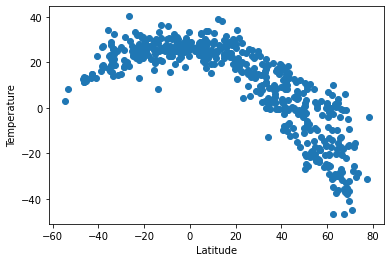

In [13]:
x_values = df['lat']
y_values = df['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

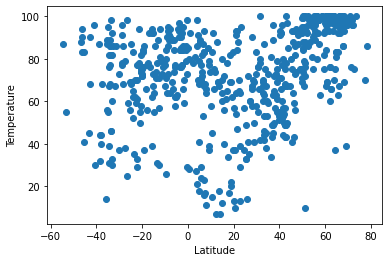

In [14]:
x_values = df['lat']
y_values = df['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Cloudiness Plot

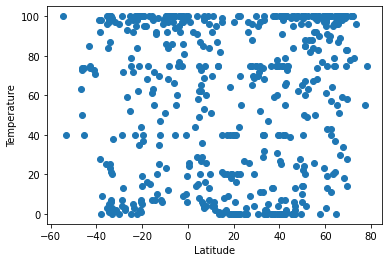

In [15]:
x_values = df['lat']
y_values = df['clouds']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Wind Speed Plot

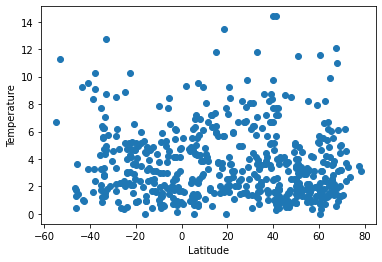

In [16]:
x_values = df['lat']
y_values = df['wind']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Linear Regression

In [17]:
NorthHemp_df = df.loc[df['lat']>0]
SouthHemp_df = df.loc[df['lat']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

1      27.834402
2      19.433009
9      20.969627
10     18.161766
11      4.446410
         ...    
543     1.456792
544    -2.991945
546   -16.394038
547    30.378356
549   -13.096868
Name: lat, Length: 369, dtype: float64


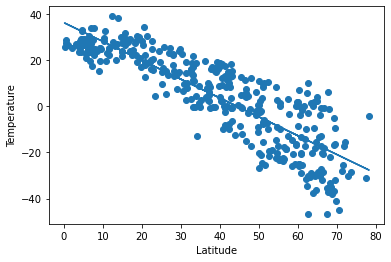

In [18]:
x_values = NorthHemp_df['lat']
y_values = NorthHemp_df['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      23.291313
3      19.789724
4      23.743141
5      28.557344
6      27.837097
         ...    
545    28.562050
548    25.100507
550    23.154916
551    21.665081
552    23.085952
Name: lat, Length: 184, dtype: float64


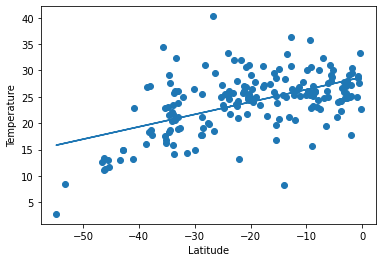

In [19]:
x_values = SouthHemp_df['lat']
y_values = SouthHemp_df['temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

1      55.538394
2      61.512852
9      60.420121
10     62.416867
11     72.170227
         ...    
543    74.296225
544    77.459842
546    86.990433
547    53.729320
549    84.645726
Name: lat, Length: 369, dtype: float64


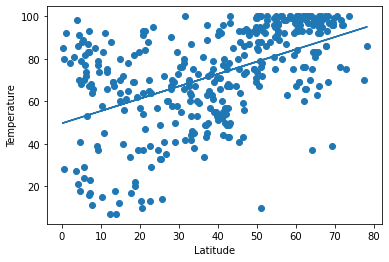

In [20]:
x_values = NorthHemp_df['lat']
y_values = NorthHemp_df['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      70.768941
3      66.239534
4      71.353394
5      77.580704
6      76.649044
         ...    
545    77.586791
548    73.109186
550    70.592507
551    68.665363
552    70.503300
Name: lat, Length: 184, dtype: float64


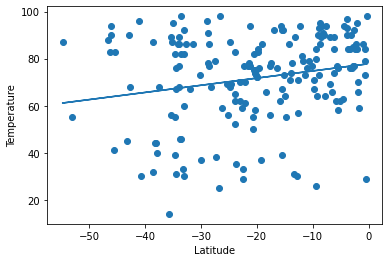

In [21]:
x_values = SouthHemp_df['lat']
y_values = SouthHemp_df['humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

1      37.884492
2      44.293903
9      43.121619
10     45.263732
11     55.727157
         ...    
543    58.007932
544    61.401867
546    71.626304
547    35.943713
549    69.110898
Name: lat, Length: 369, dtype: float64


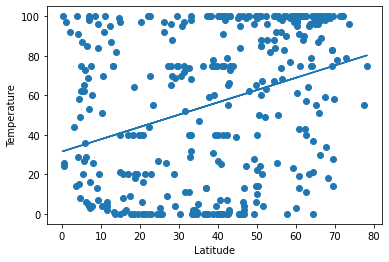

In [22]:
x_values = NorthHemp_df['lat']
y_values = NorthHemp_df['clouds']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      62.236360
3      53.378475
4      63.379338
5      75.557710
6      73.735719
         ...    
545    75.569614
548    66.813033
550    61.891318
551    58.122520
552    61.716862
Name: lat, Length: 184, dtype: float64


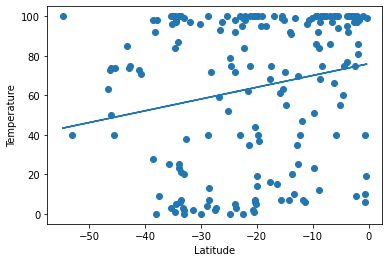

In [23]:
x_values = SouthHemp_df['lat']
y_values = SouthHemp_df['clouds']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

1      4.246498
2      4.051376
9      4.087064
10     4.021852
11     3.703314
         ...   
543    3.633880
544    3.530559
546    3.219296
547    4.305581
549    3.295873
Name: lat, Length: 369, dtype: float64


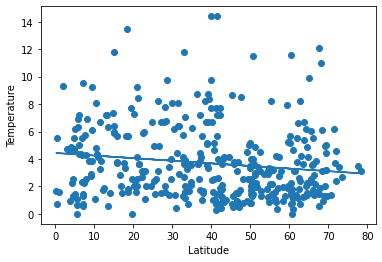

In [24]:
x_values = NorthHemp_df['lat']
y_values = NorthHemp_df['wind']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      3.703536
3      4.339485
4      3.621476
5      2.747134
6      2.877943
         ...   
545    2.746279
548    3.374955
550    3.728308
551    3.998888
552    3.740833
Name: lat, Length: 184, dtype: float64


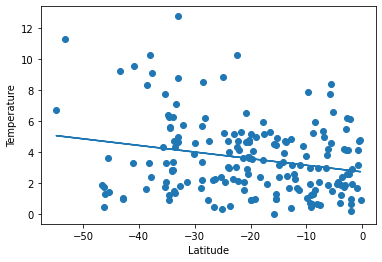

In [25]:
x_values = SouthHemp_df['lat']
y_values = SouthHemp_df['wind']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)
plt.plot(x_values, regress_values)

plt.show()